In [1]:
!nvidia-smi

Mon Jun  9 19:46:08 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:1E.0 Off |                    0 |
| N/A   29C    P8              11W /  70W |      2MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import sys
print(sys.version)

3.9.23 (main, Jun  5 2025, 13:40:20) 
[GCC 11.2.0]


In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
%pip install -r requirements.txt

c:\Users\Aashutosh\Desktop\Object_Detection_Yolov7_Project\yolov7


fatal: destination path 'yolov7' already exists and is not an empty directory.


In [3]:
import os

In [19]:
train_img_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/dataset/images/train"
val_img_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/dataset/images/val"

In [20]:
%cd /home/ubuntu/Object_Detection_Yolov7_Project

/home/ubuntu/Object_Detection_Yolov7_Project


In [22]:
#Training images
with open('train.txt', "a+") as f:
  img_list = os.listdir(train_img_path)
  for img in img_list:
    f.write(os.path.join(train_img_path,img+'\n'))
  print("Done")

Done


In [23]:
# Validation Image
with open('val.txt', "a+") as f:
  img_list = os.listdir(val_img_path)
  for img in img_list:
    f.write(os.path.join(val_img_path,img+'\n'))
  print("Done")

Done


In [24]:
import shutil

# Local path copy (Windows)
shutil.copy(
    r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/data/coco.yaml",
    r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/data/custom.yaml"
)


'/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/data/custom.yaml'

In [25]:
custom_yaml_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/data/custom.yaml"

yaml_content = """train: /home/ubuntu/Object_Detection_Yolov7_Project/train.txt
val: /home/ubuntu/Object_Detection_Yolov7_Project/val.txt

nc: 2

# class names
names: ['1', 'pepperonipizza']
"""

with open(custom_yaml_path, 'w') as f:
    f.write(yaml_content)


In [26]:
import urllib.request

url = "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"
output_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/yolov7.pt"

urllib.request.urlretrieve(url, output_path)

print("Downloaded yolov7.pt")


Downloaded yolov7.pt


In [27]:
import shutil

# Define paths
src_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/cfg/training/yolov7.yaml"
dst_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/cfg/training/custom_yolov7.yaml"

# Copy file
shutil.copy(src_path, dst_path)
print("Copied yolov7.yaml to custom_yolov7.yaml")


Copied yolov7.yaml to custom_yolov7.yaml


In [28]:
custom_yaml_path = r"/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/cfg/training/custom_yolov7.yaml"

# Full content for custom_yolov7.yaml
new_yaml_content = """# parameters
nc: 2  # number of classes 
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   [75, 1, RepConv, [256, 3, 1]],
   [88, 1, RepConv, [512, 3, 1]],
   [101, 1, RepConv, [1024, 3, 1]],
   [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]
"""

# Write to file
with open(custom_yaml_path, 'w') as f:
    f.write(new_yaml_content)

print("custom_yolov7.yaml written successfully.")


custom_yolov7.yaml written successfully.


In [29]:
%pwd

'/home/ubuntu/Object_Detection_Yolov7_Project'

In [30]:
%cd /home/ubuntu/Object_Detection_Yolov7_Project/yolov7

/home/ubuntu/Object_Detection_Yolov7_Project/yolov7


In [32]:
!python train.py --batch 16 --cfg cfg/training/custom_yolov7.yaml --epochs 25 --data data/custom.yaml --weights 'yolov7.pt' --device 0

YOLOR 🚀 v0.1-128-ga207844 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 14930.5625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/custom_yolov7.yaml', data='data/custom.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=25, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/exp12', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, 

In [33]:
# Inference on test set
!python detect.py --weights runs/train/exp12/weights/best.pt \
                  --conf 0.25 \
                  --img 640 \
                  --source /home/ubuntu/Object_Detection_Yolov7_Project/dataset/images/test \
                  --save-txt \
                  --save-conf \
                  --project test_results \
                  --name yolov7_custom_test


Namespace(weights=['runs/train/exp12/weights/best.pt'], source='/home/ubuntu/Object_Detection_Yolov7_Project/dataset/images/test', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='test_results', name='yolov7_custom_test', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 14930.5625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/ubuntu/anaconda3/envs/yolov7python3.9/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2

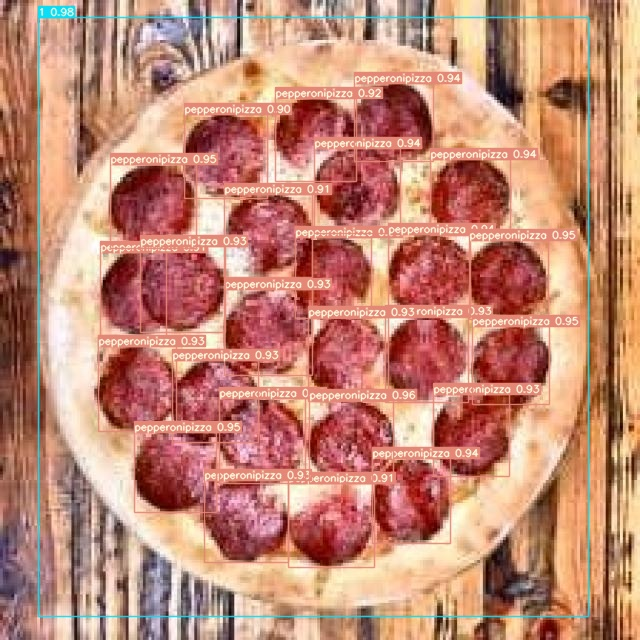

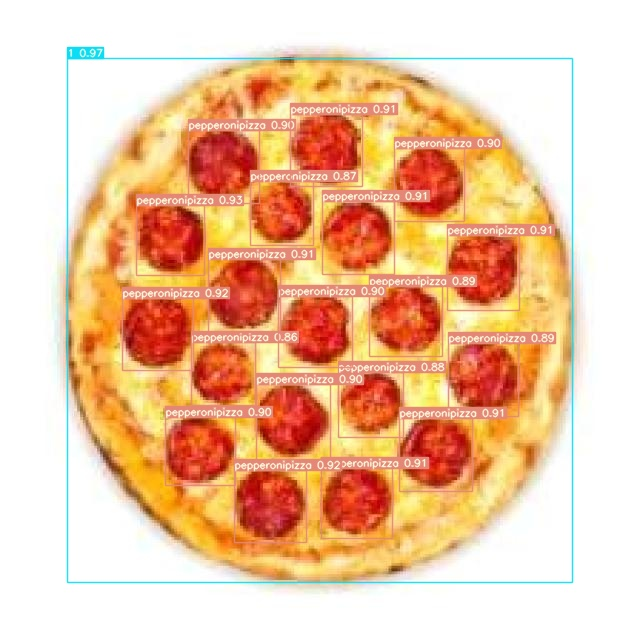

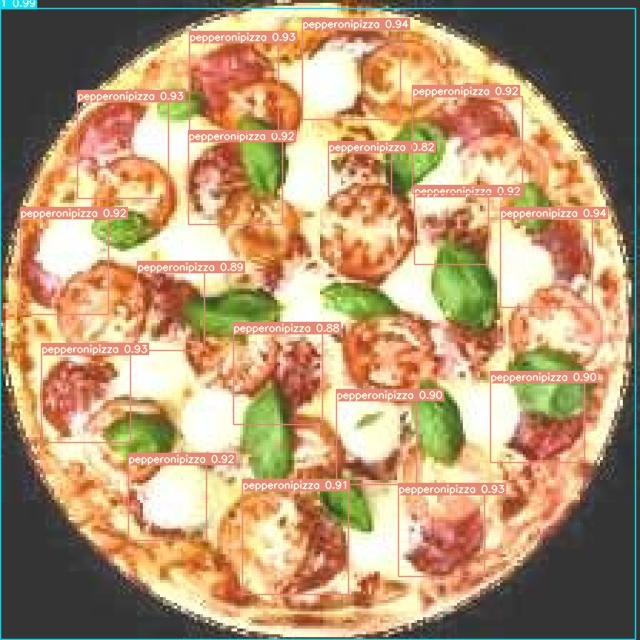

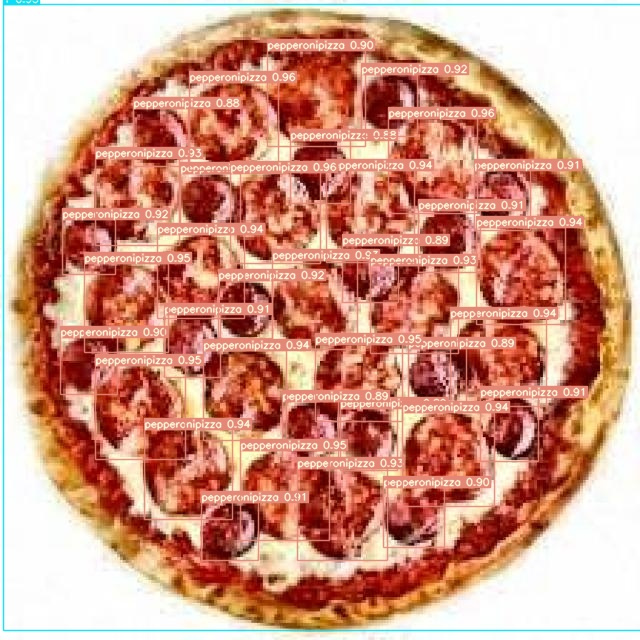

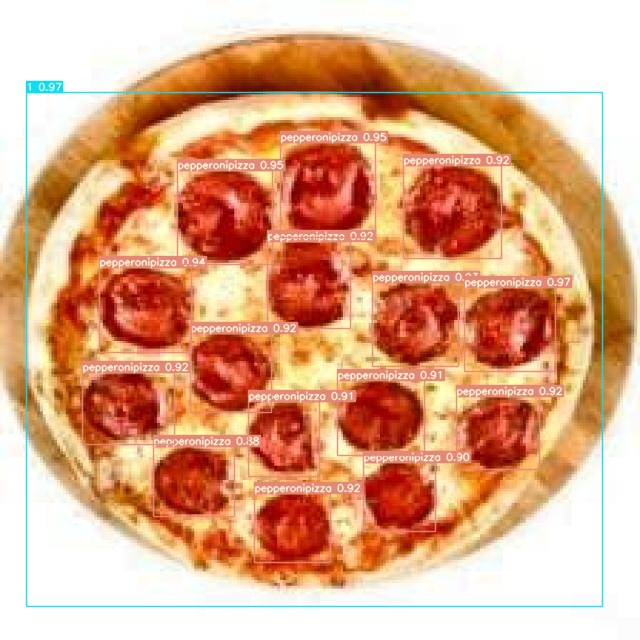

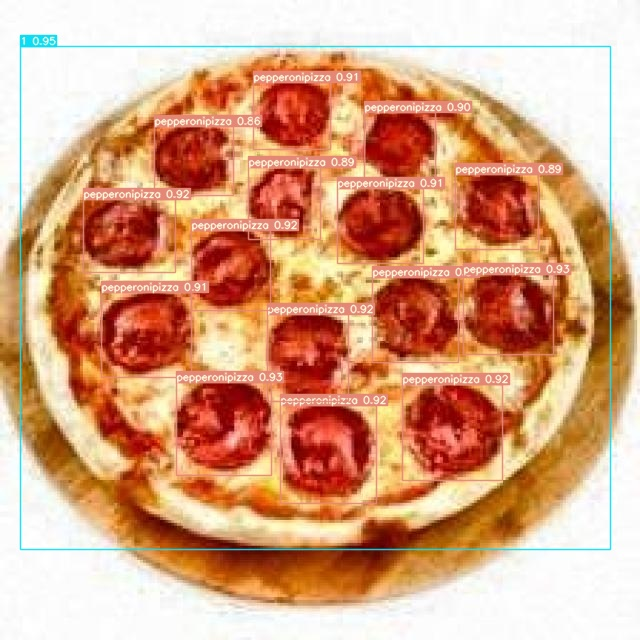

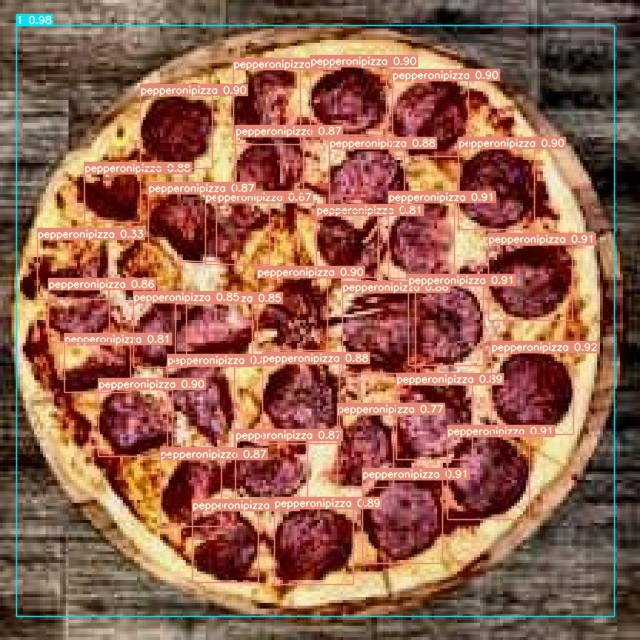

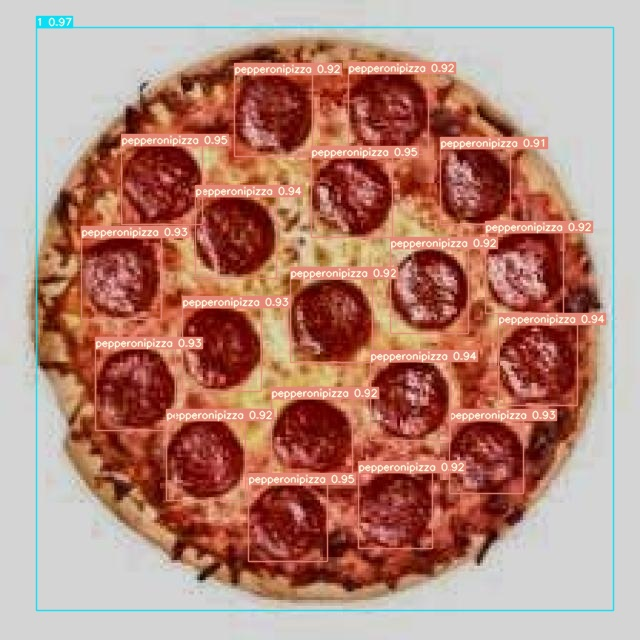

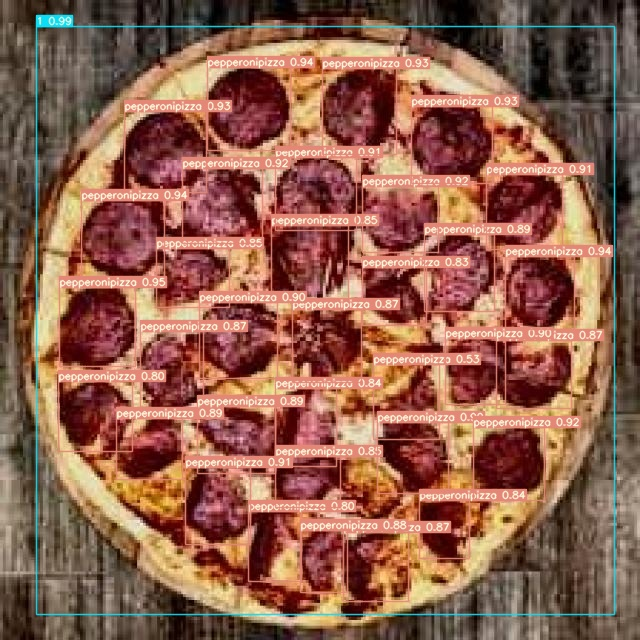

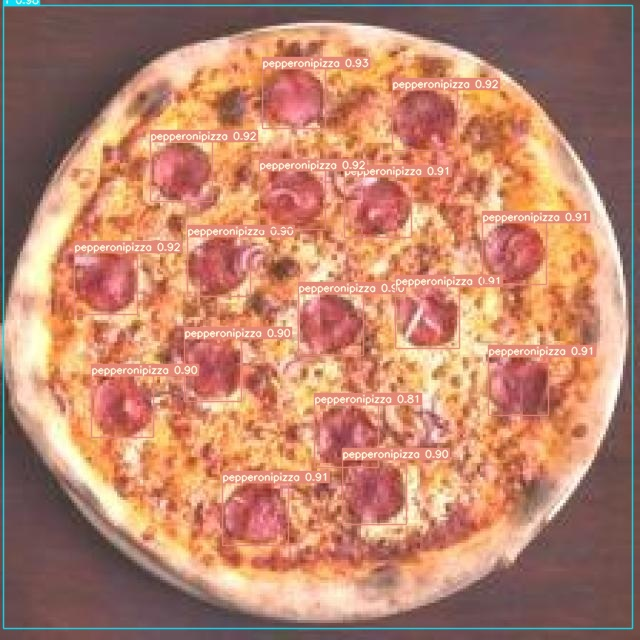

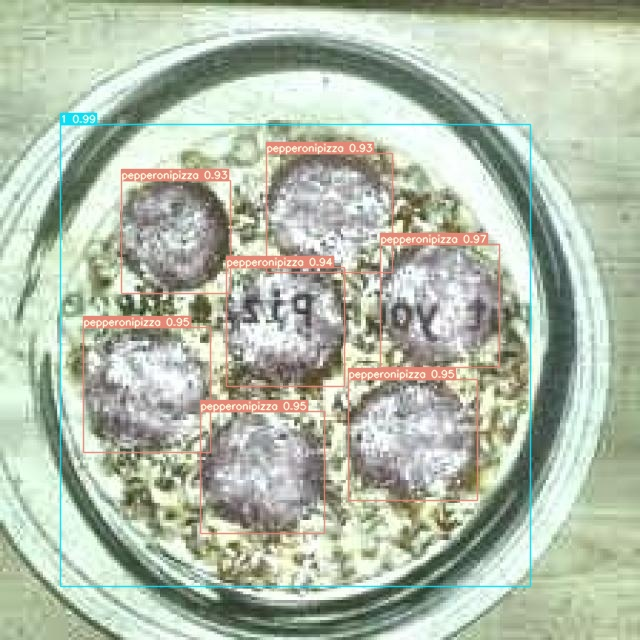

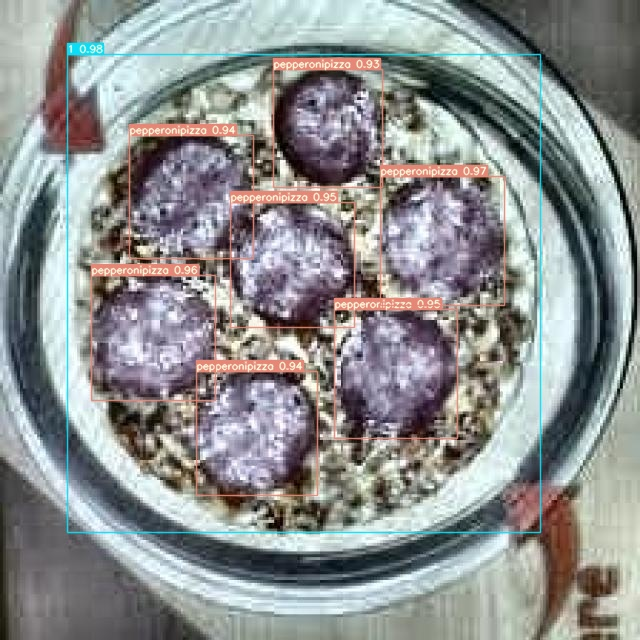

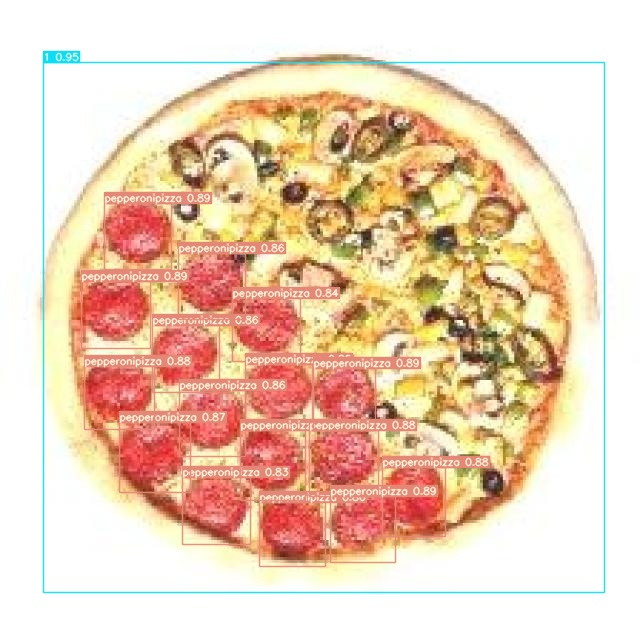

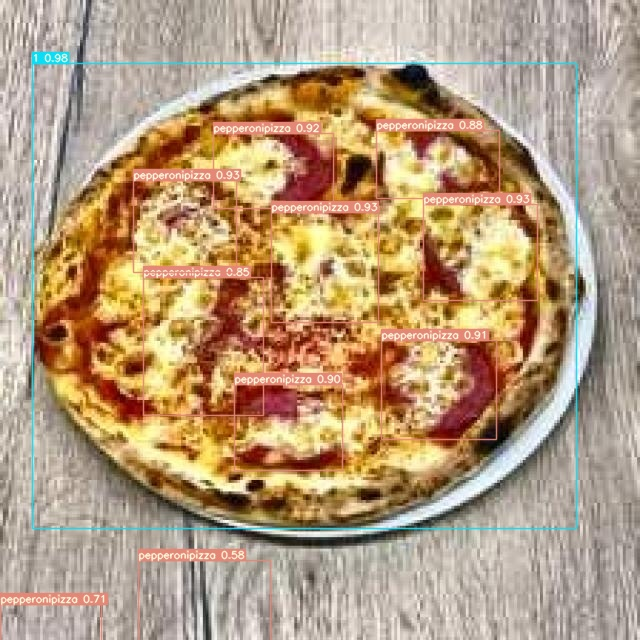

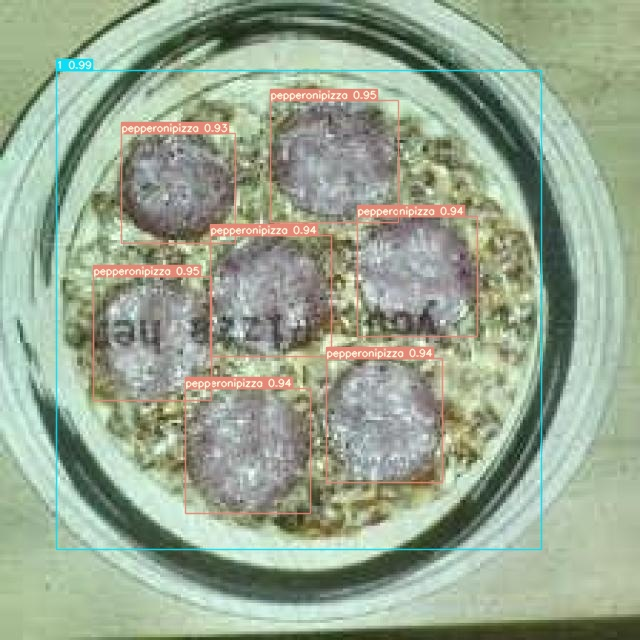

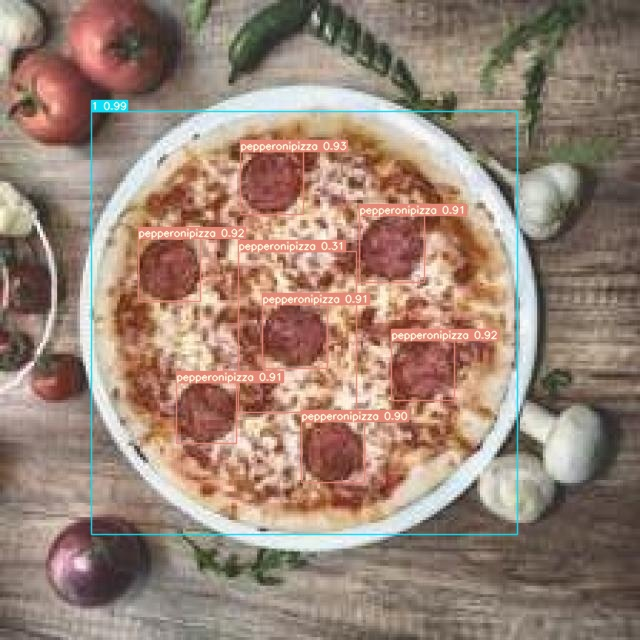

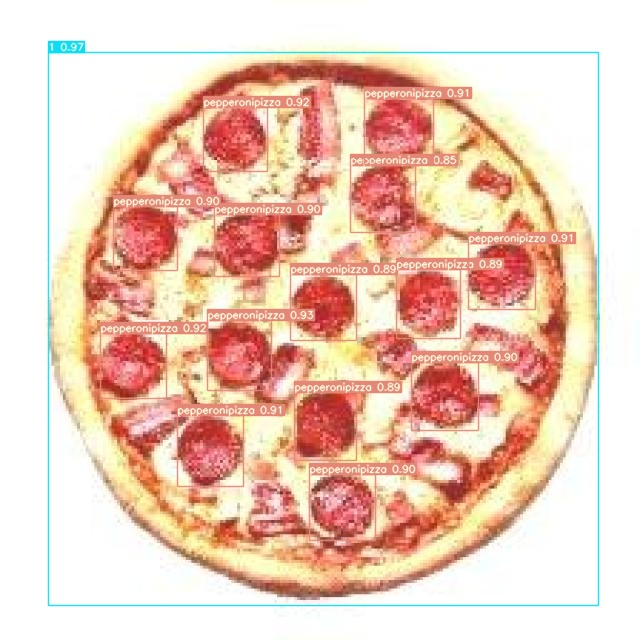

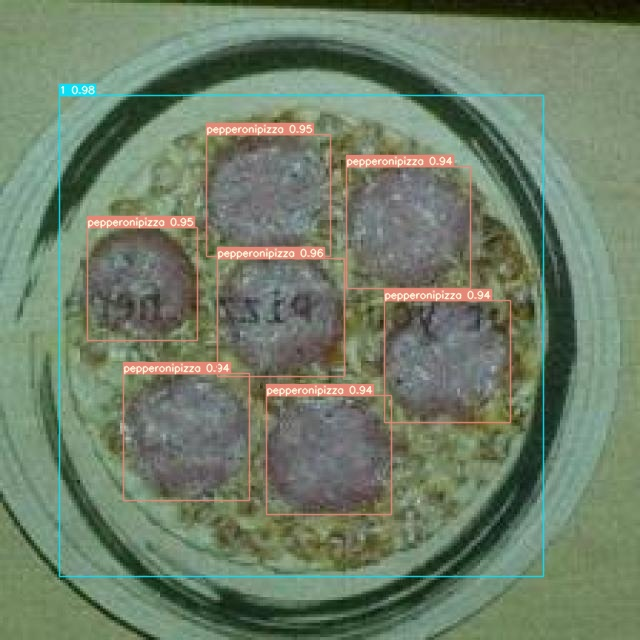

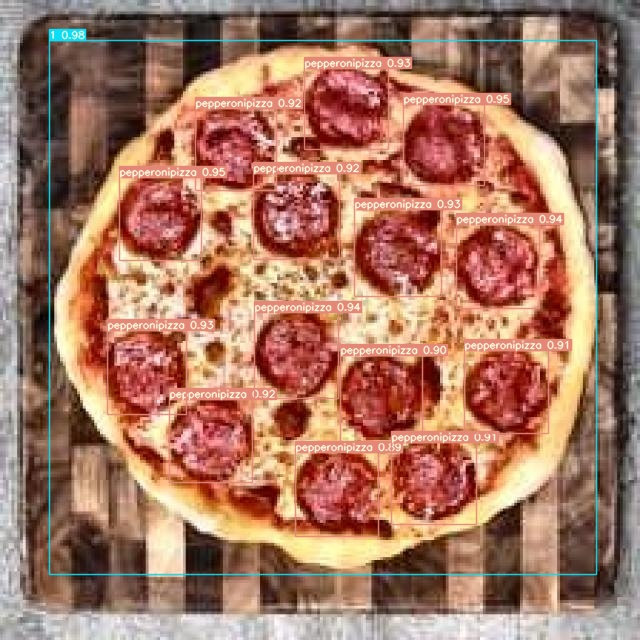

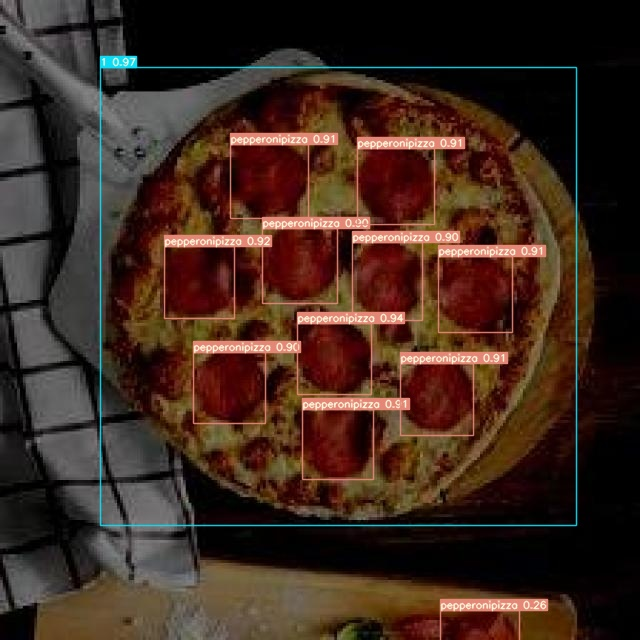

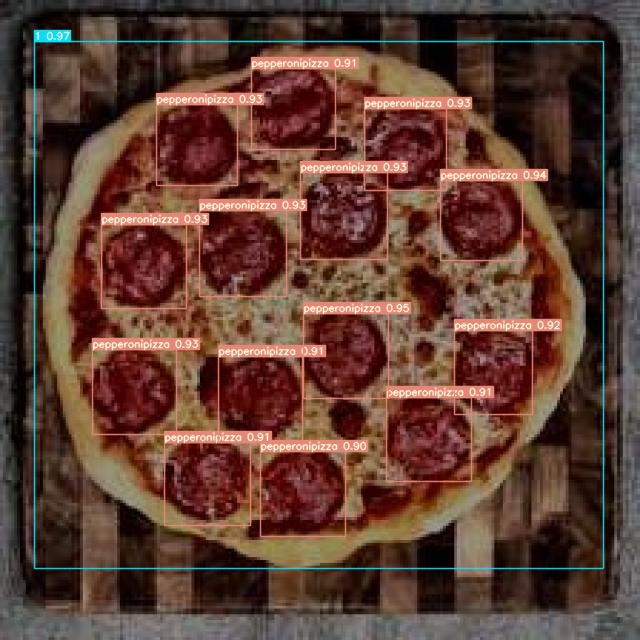

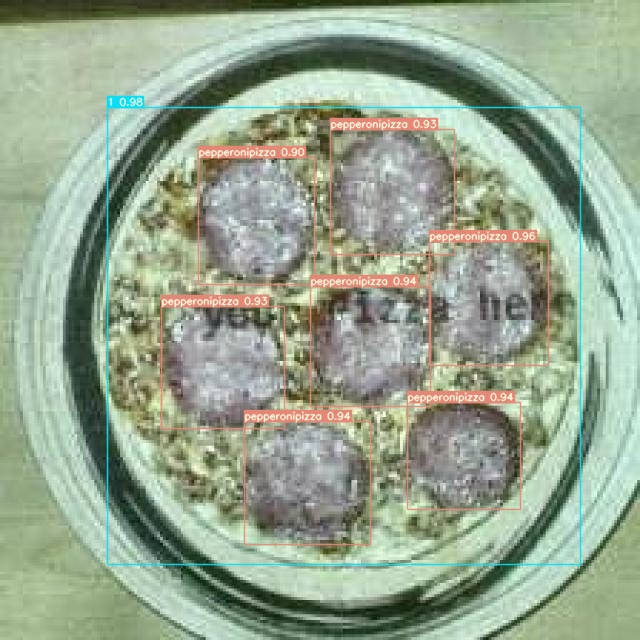

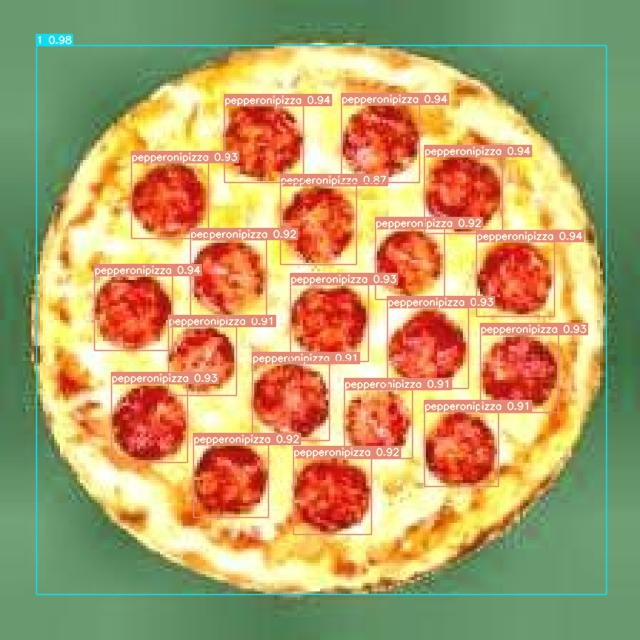

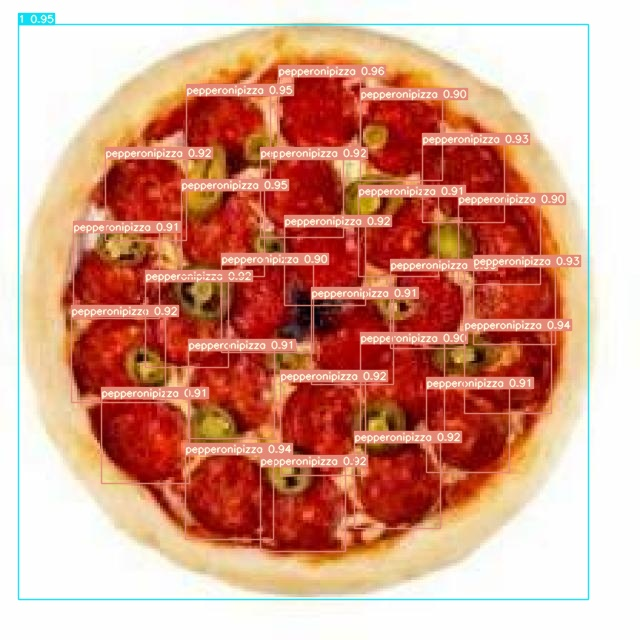

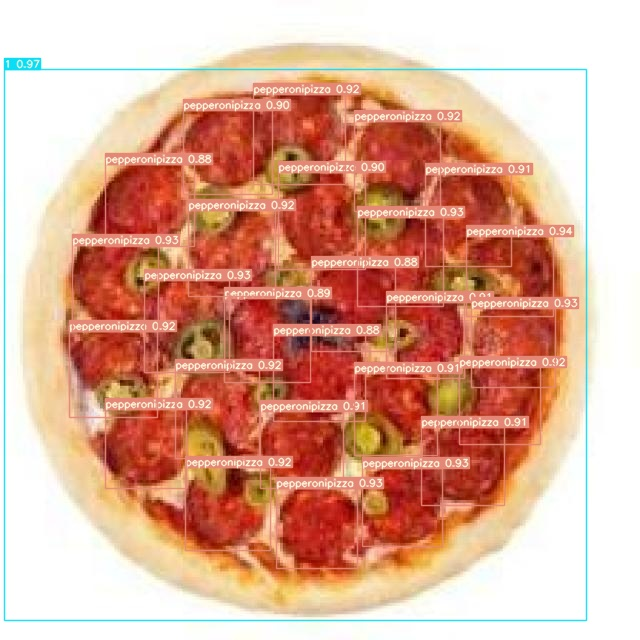

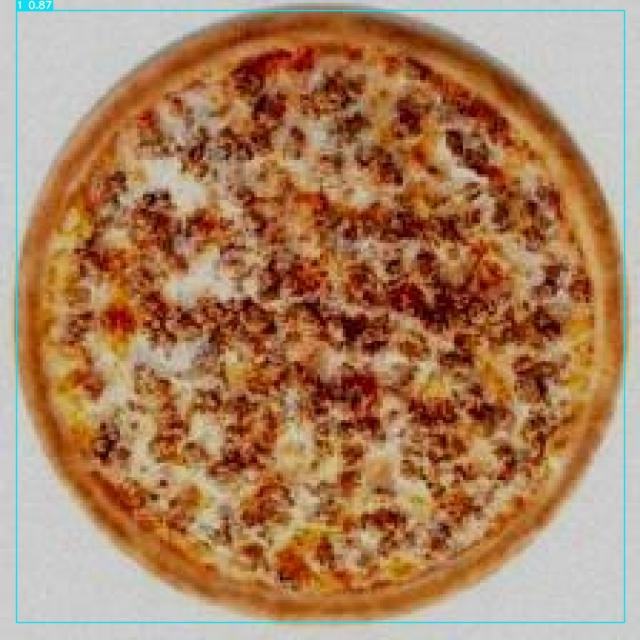

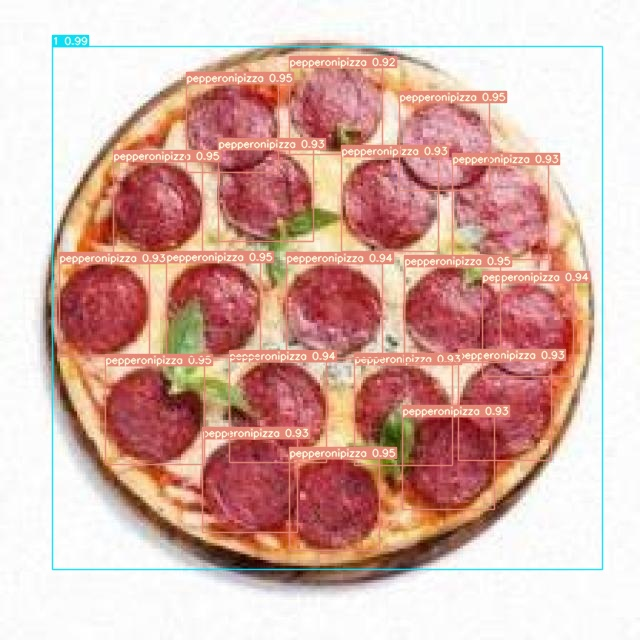

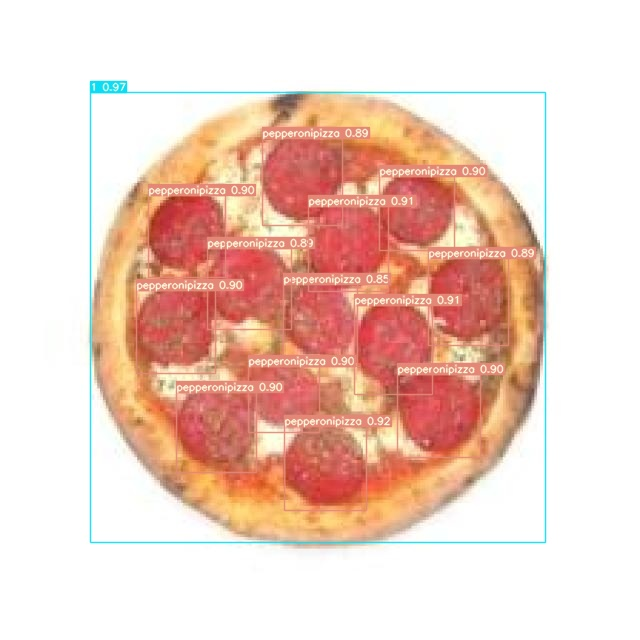

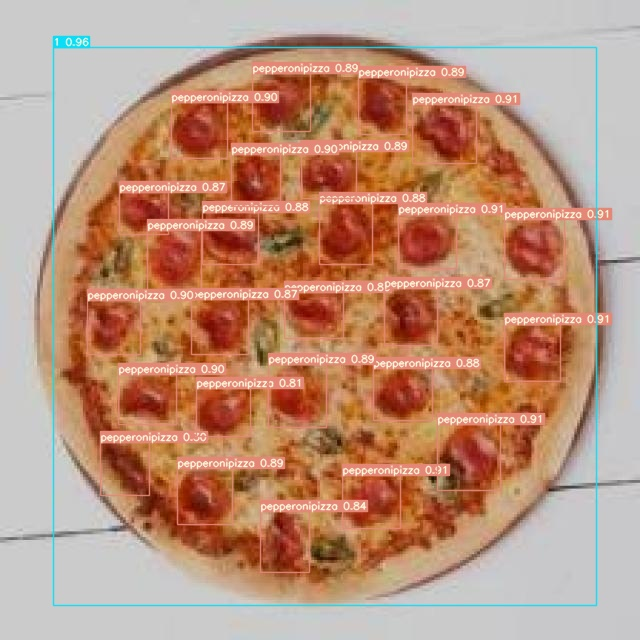

In [34]:
import os
from IPython.display import Image, display

# Path to saved test results (annotated images)
result_path = "/home/ubuntu/Object_Detection_Yolov7_Project/yolov7/test_results/yolov7_custom_test"

# List image files from the results
image_files = [os.path.join(result_path, f) for f in os.listdir(result_path) if f.endswith(('.jpg', '.png'))]

# Display all test result images with bounding boxes
for img_file in sorted(image_files):
    display(Image(filename=img_file))


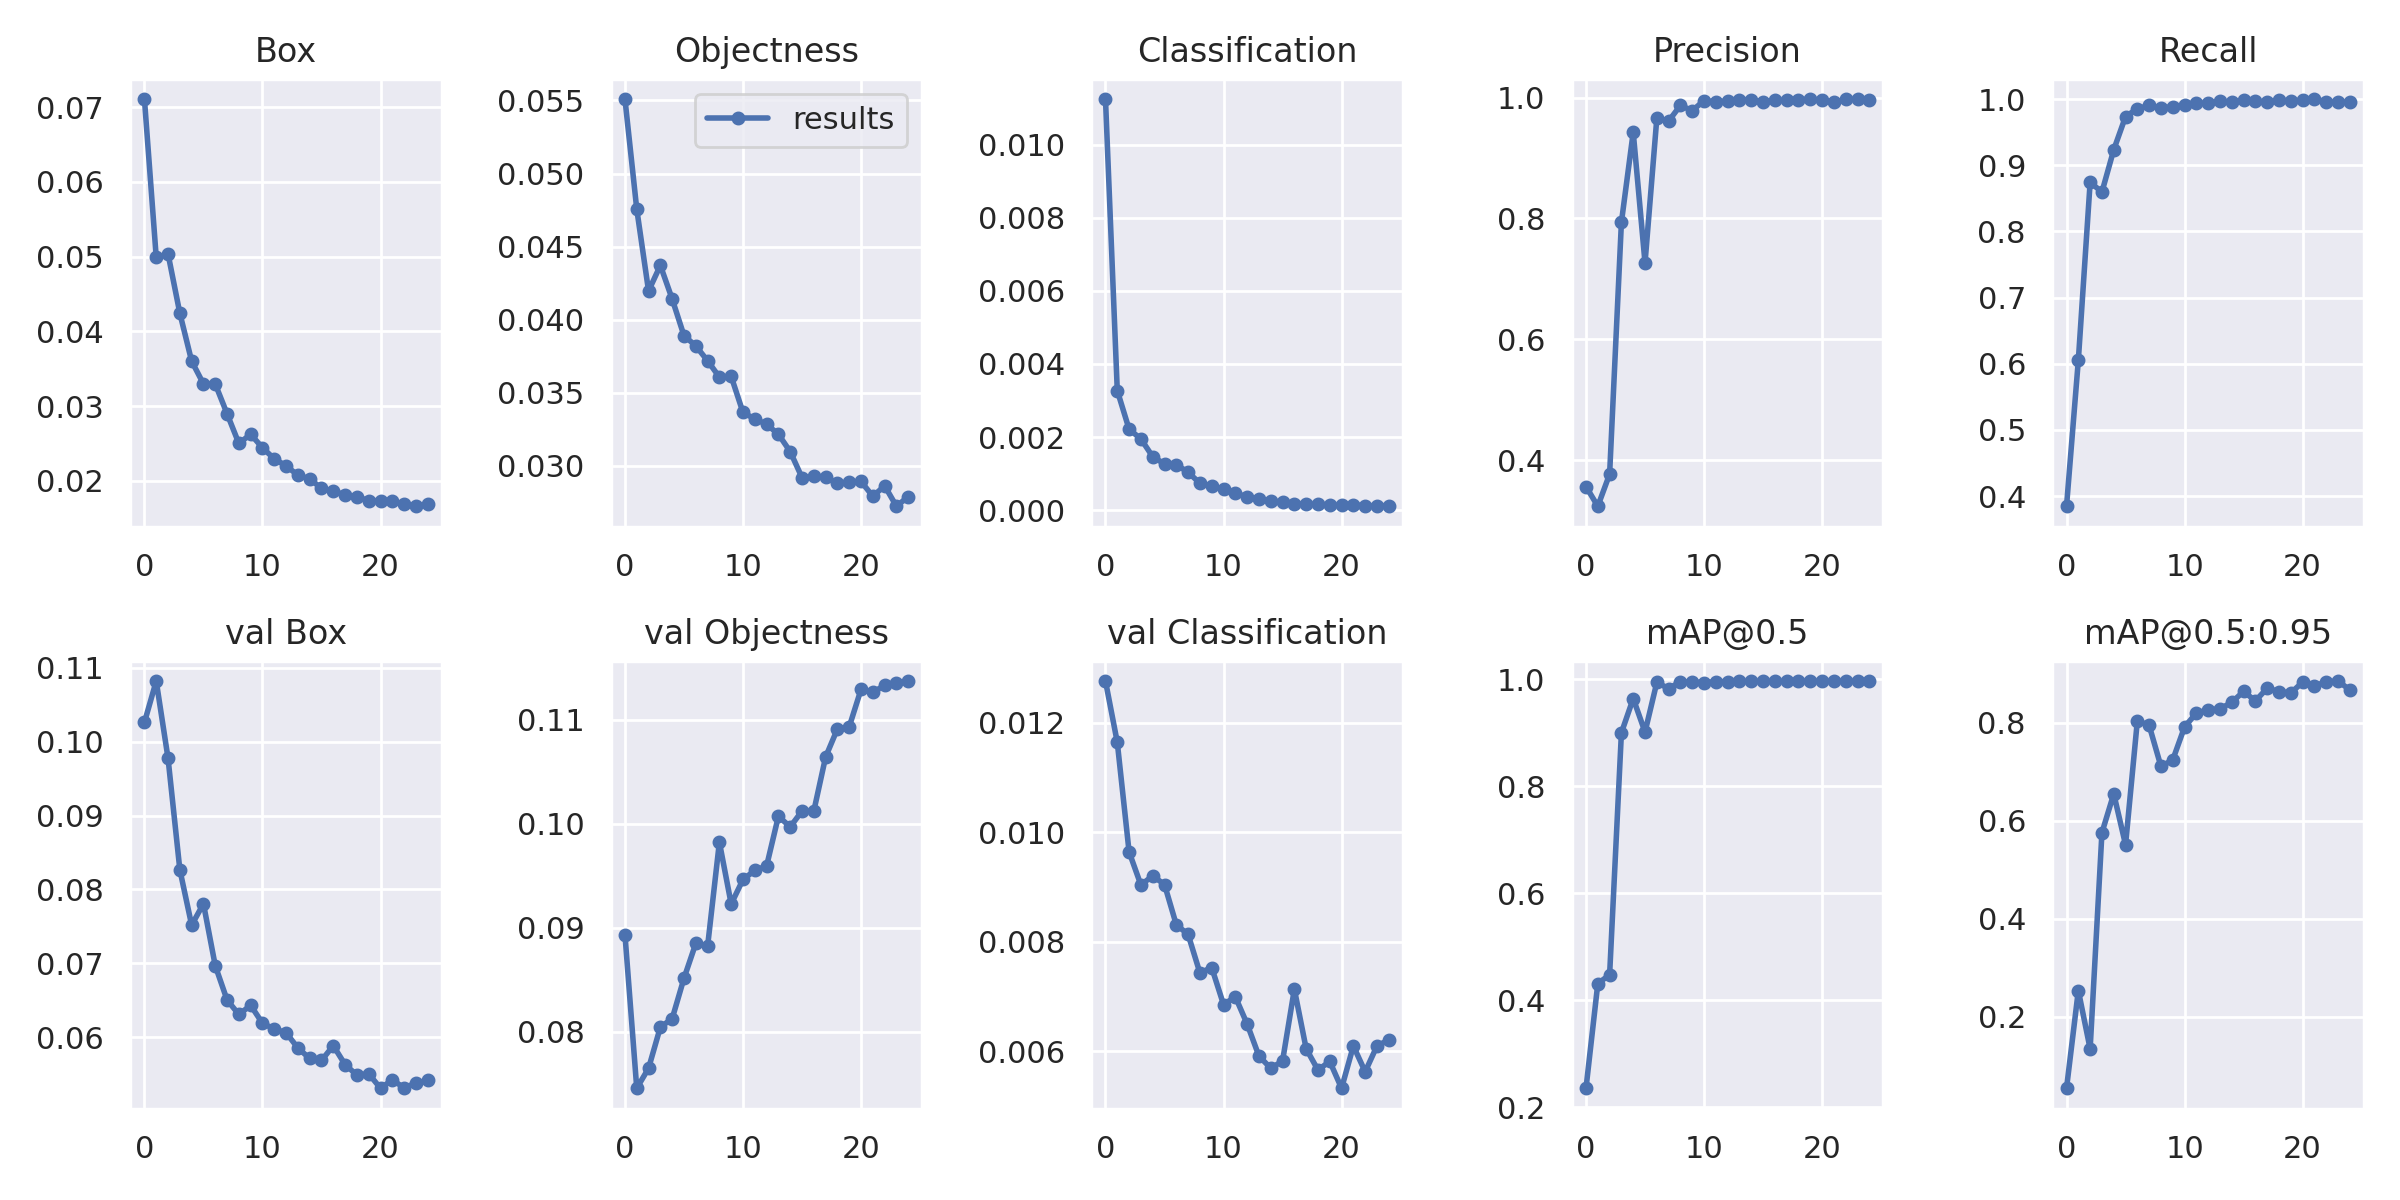

In [36]:
from IPython.display import Image
Image(filename='runs/train/exp12/results.png')  # Adjust if exp is exp1, etc.


Showing: results.png


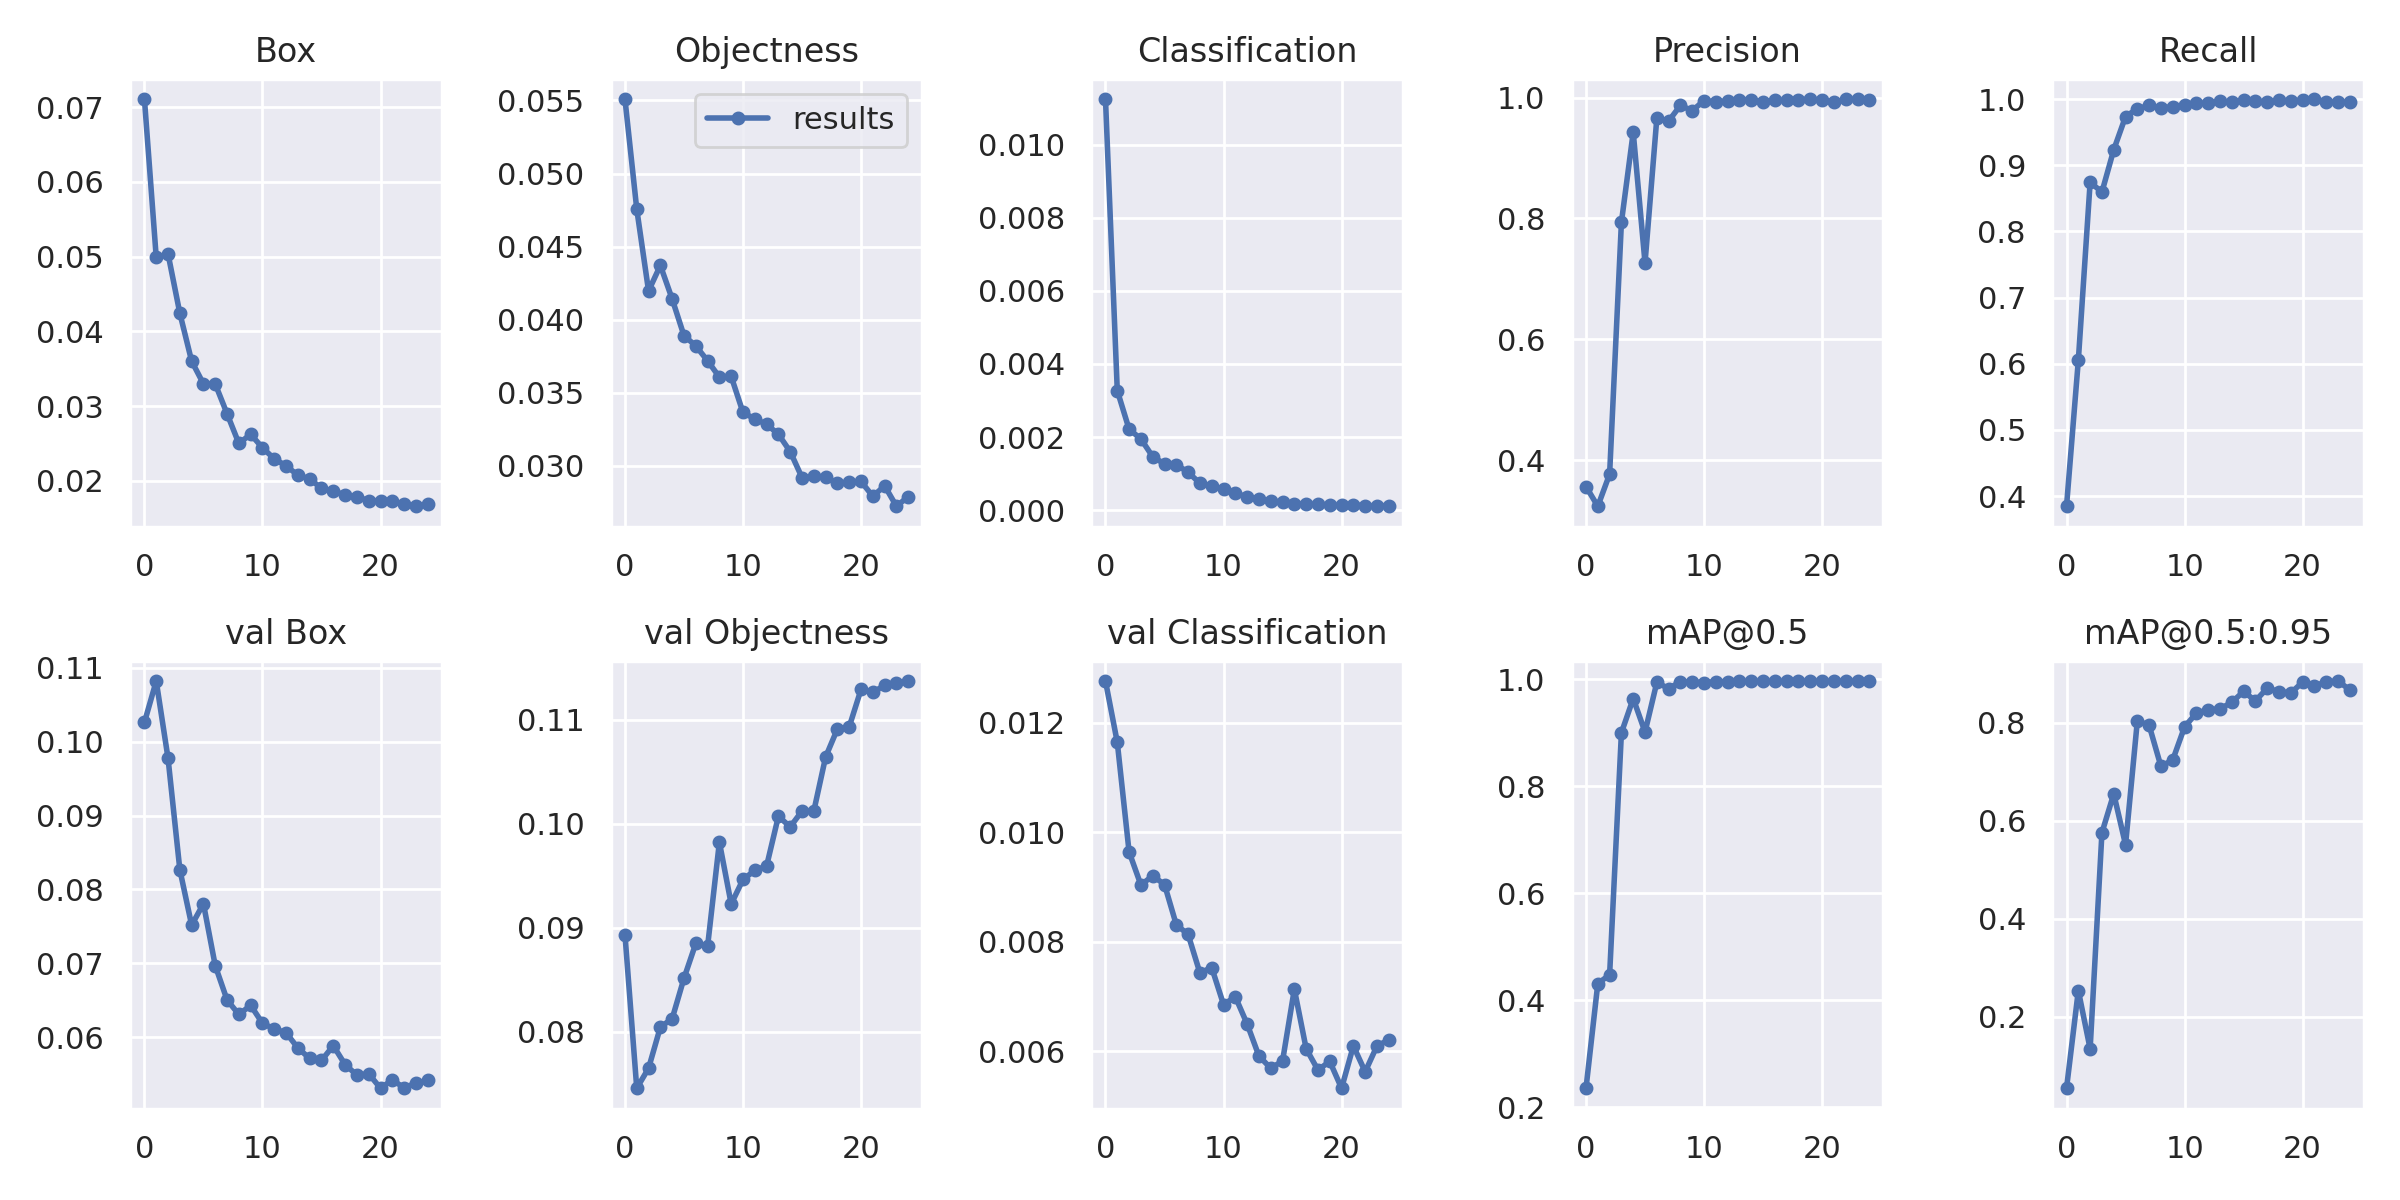

Showing: F1_curve.png


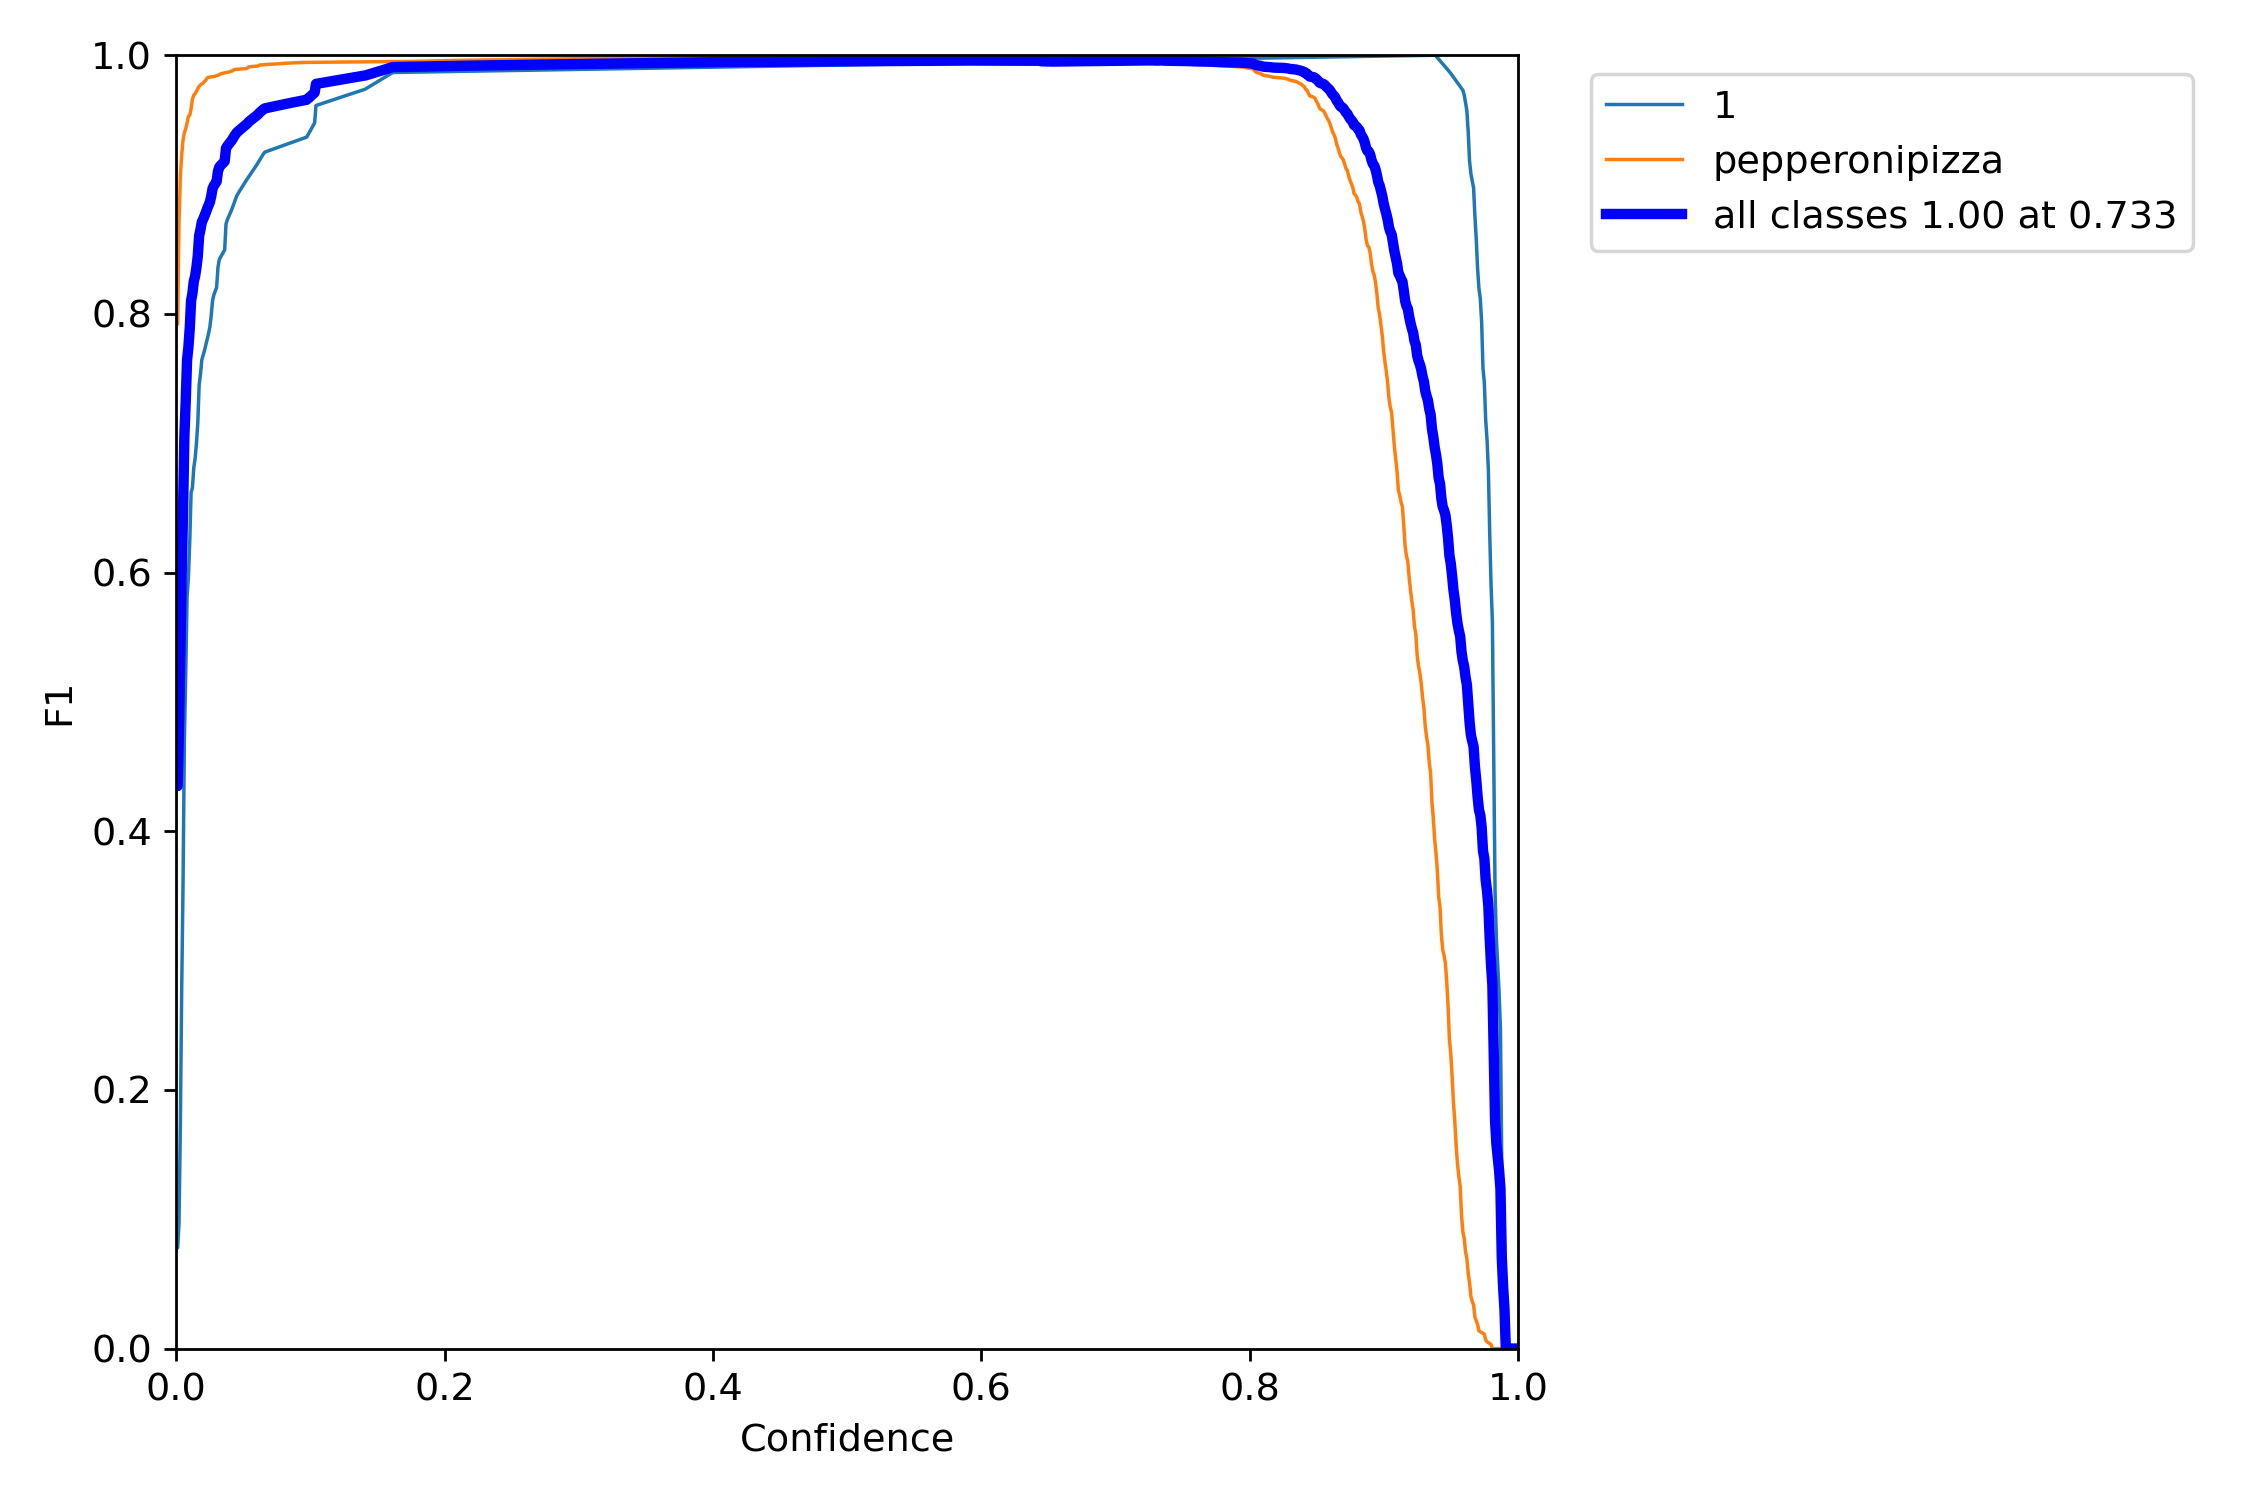

Showing: P_curve.png


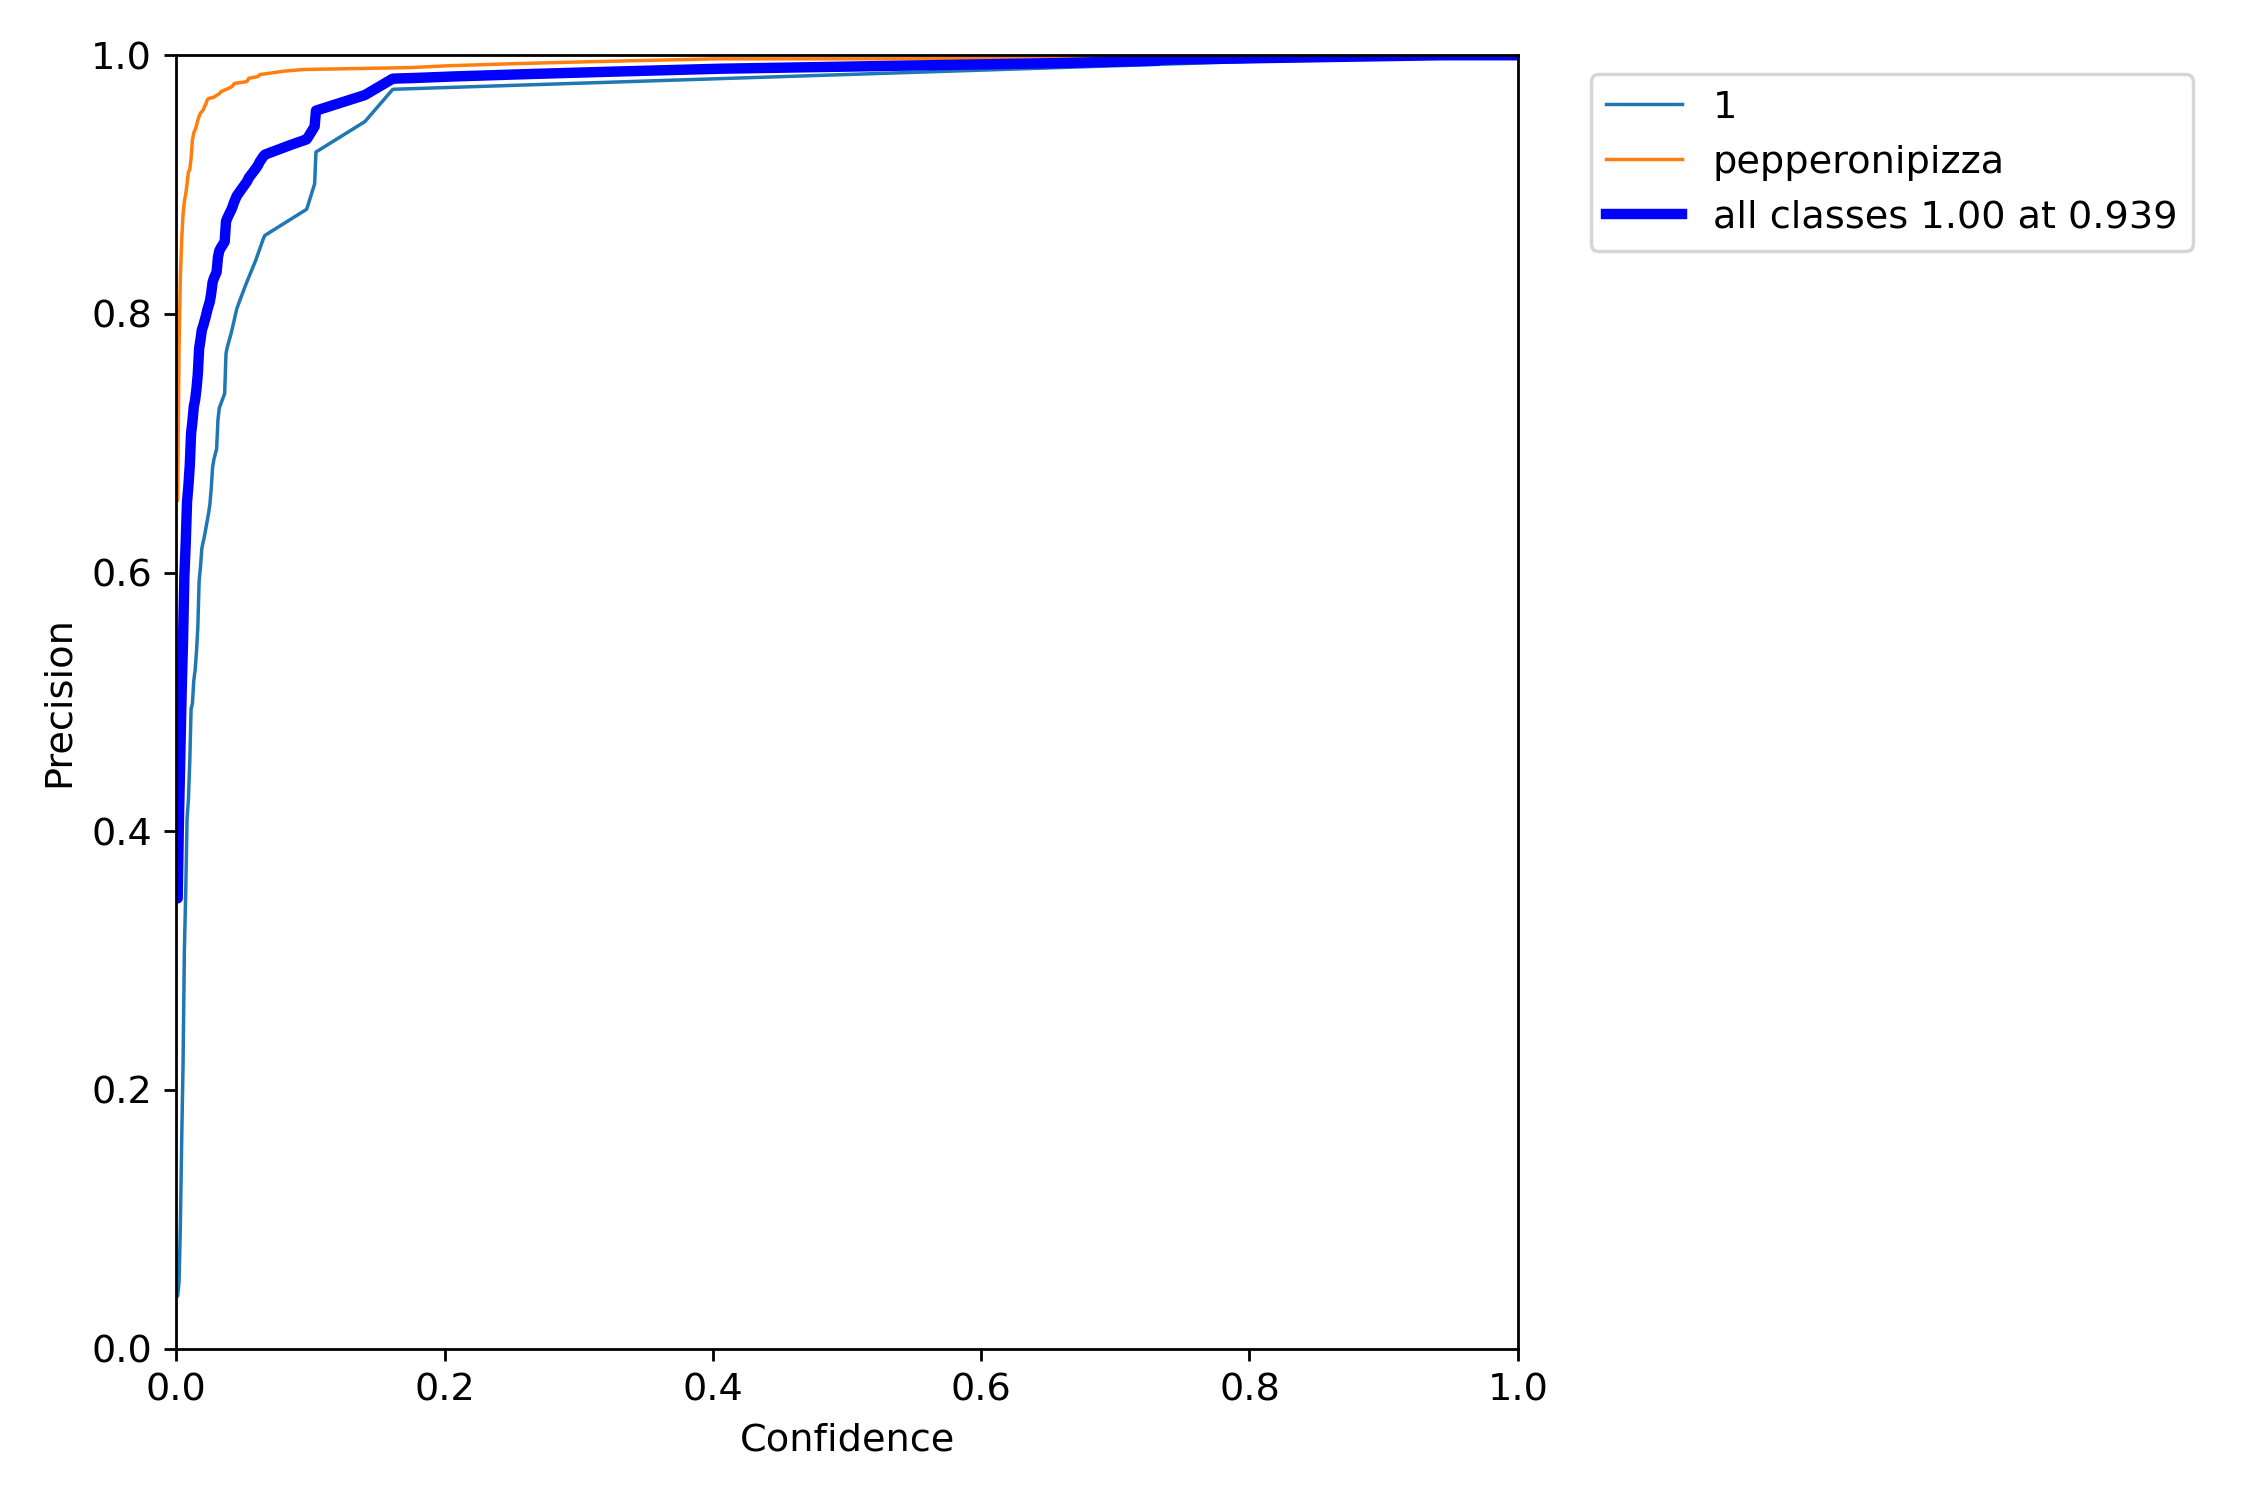

Showing: R_curve.png


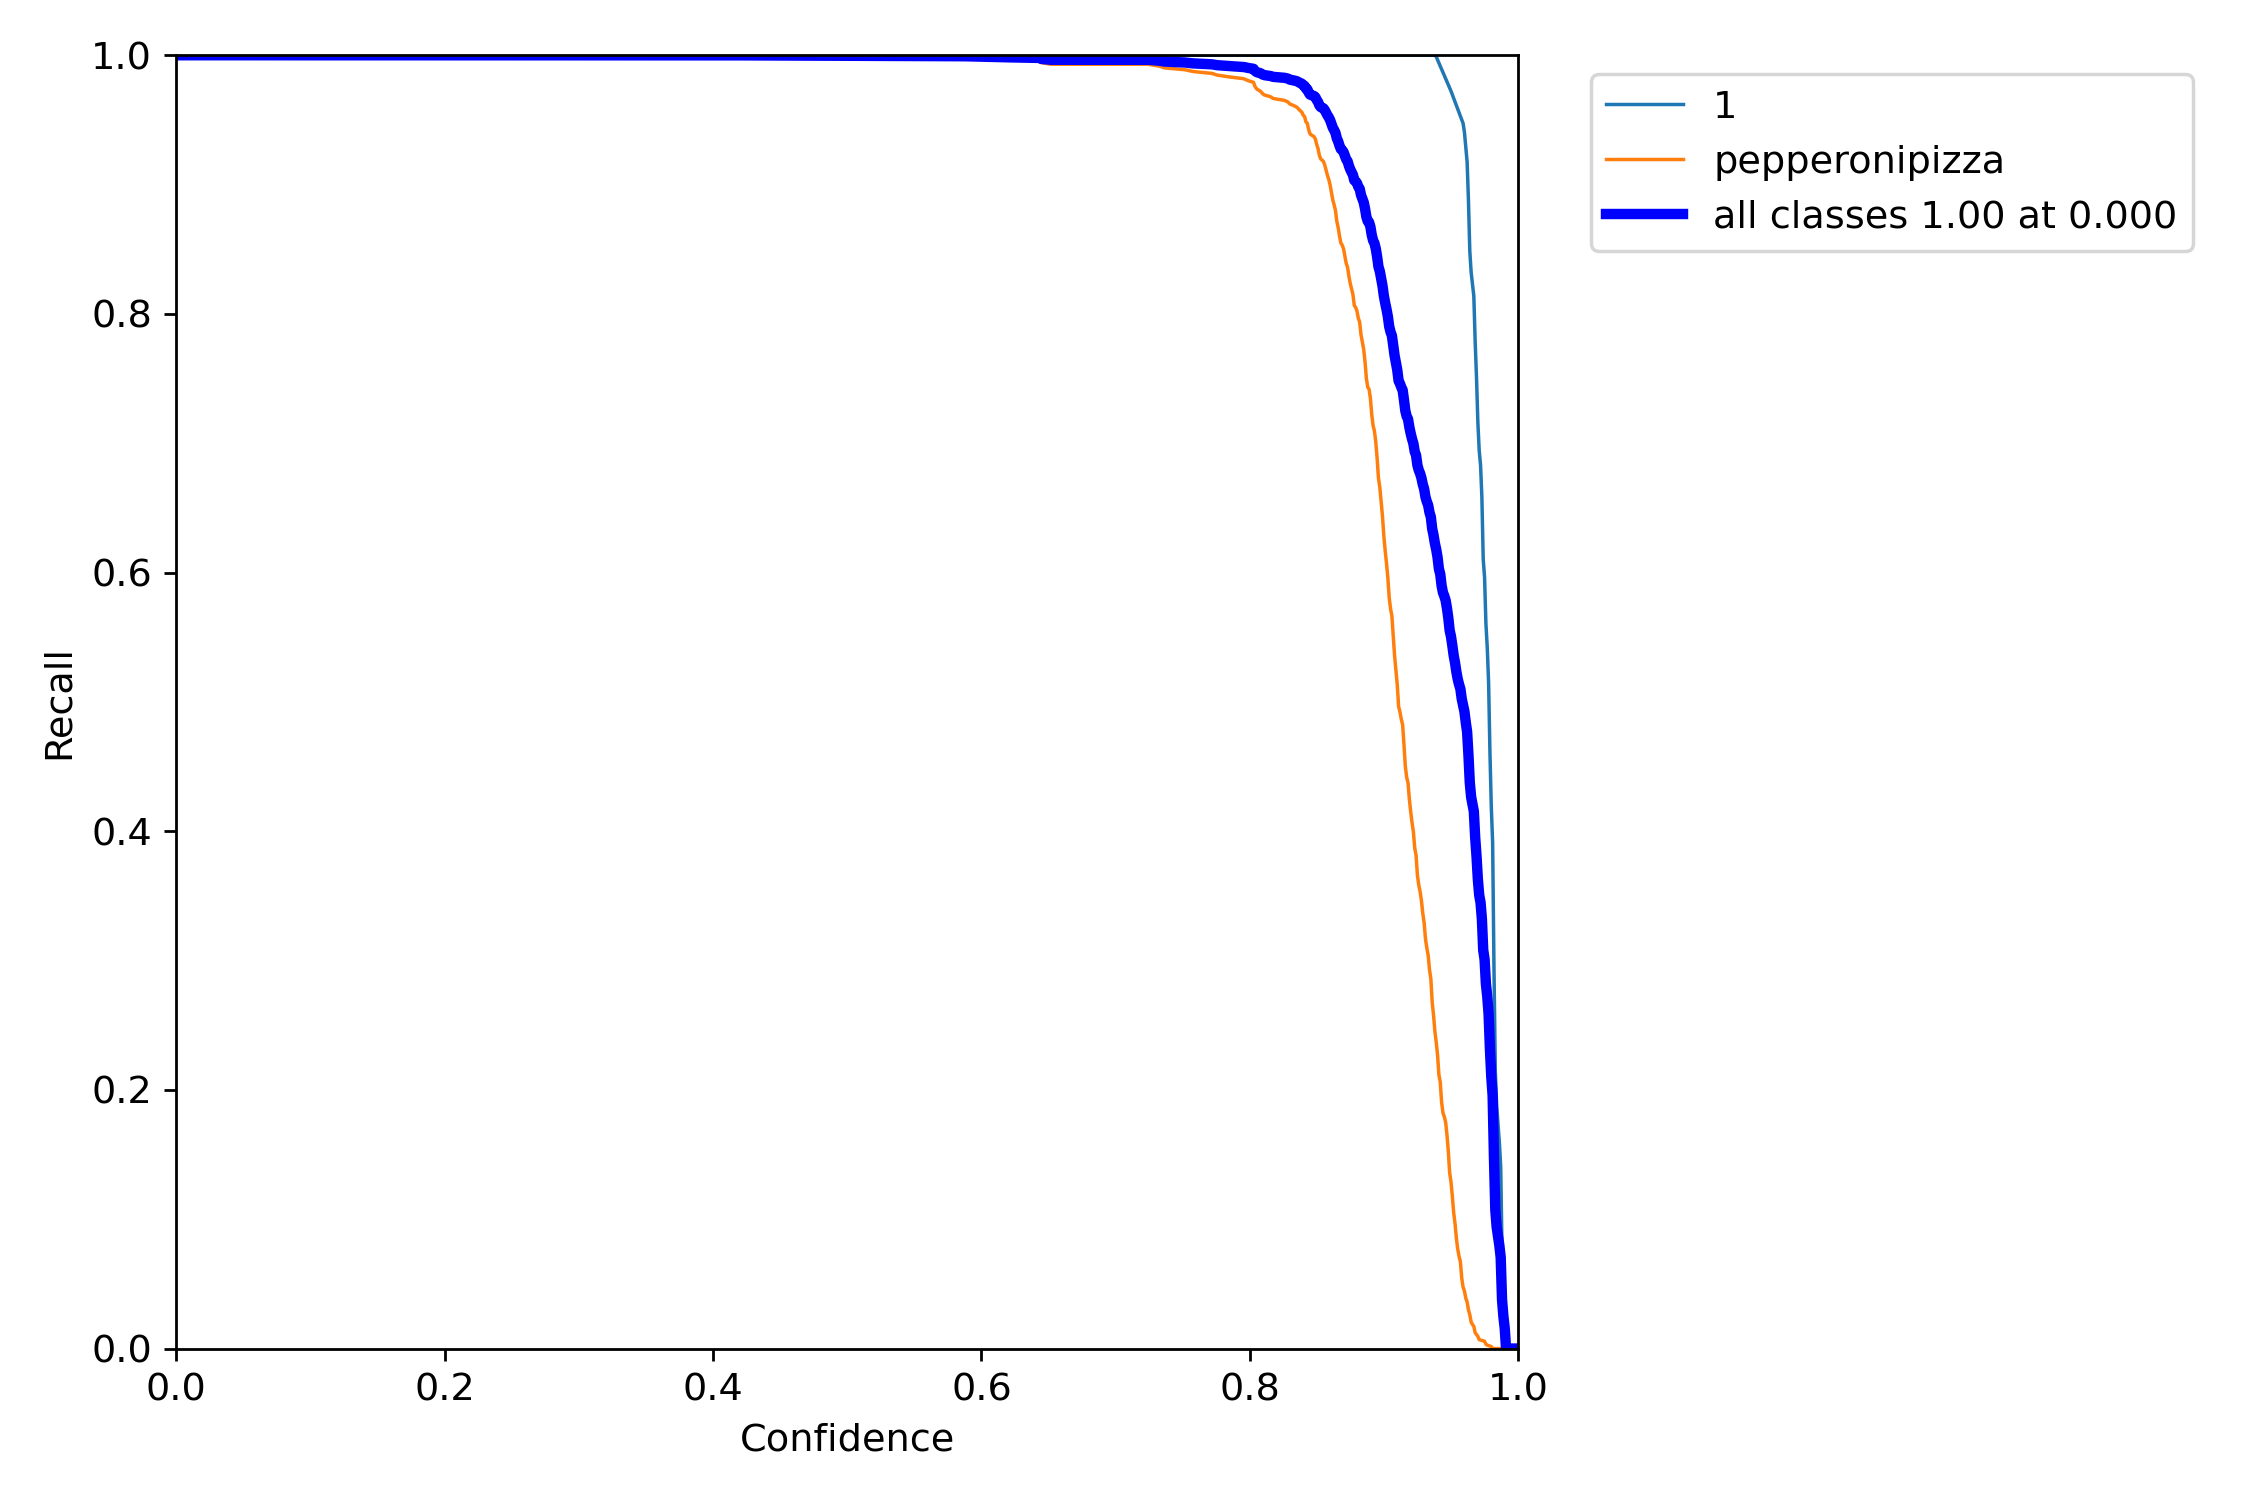

Showing: PR_curve.png


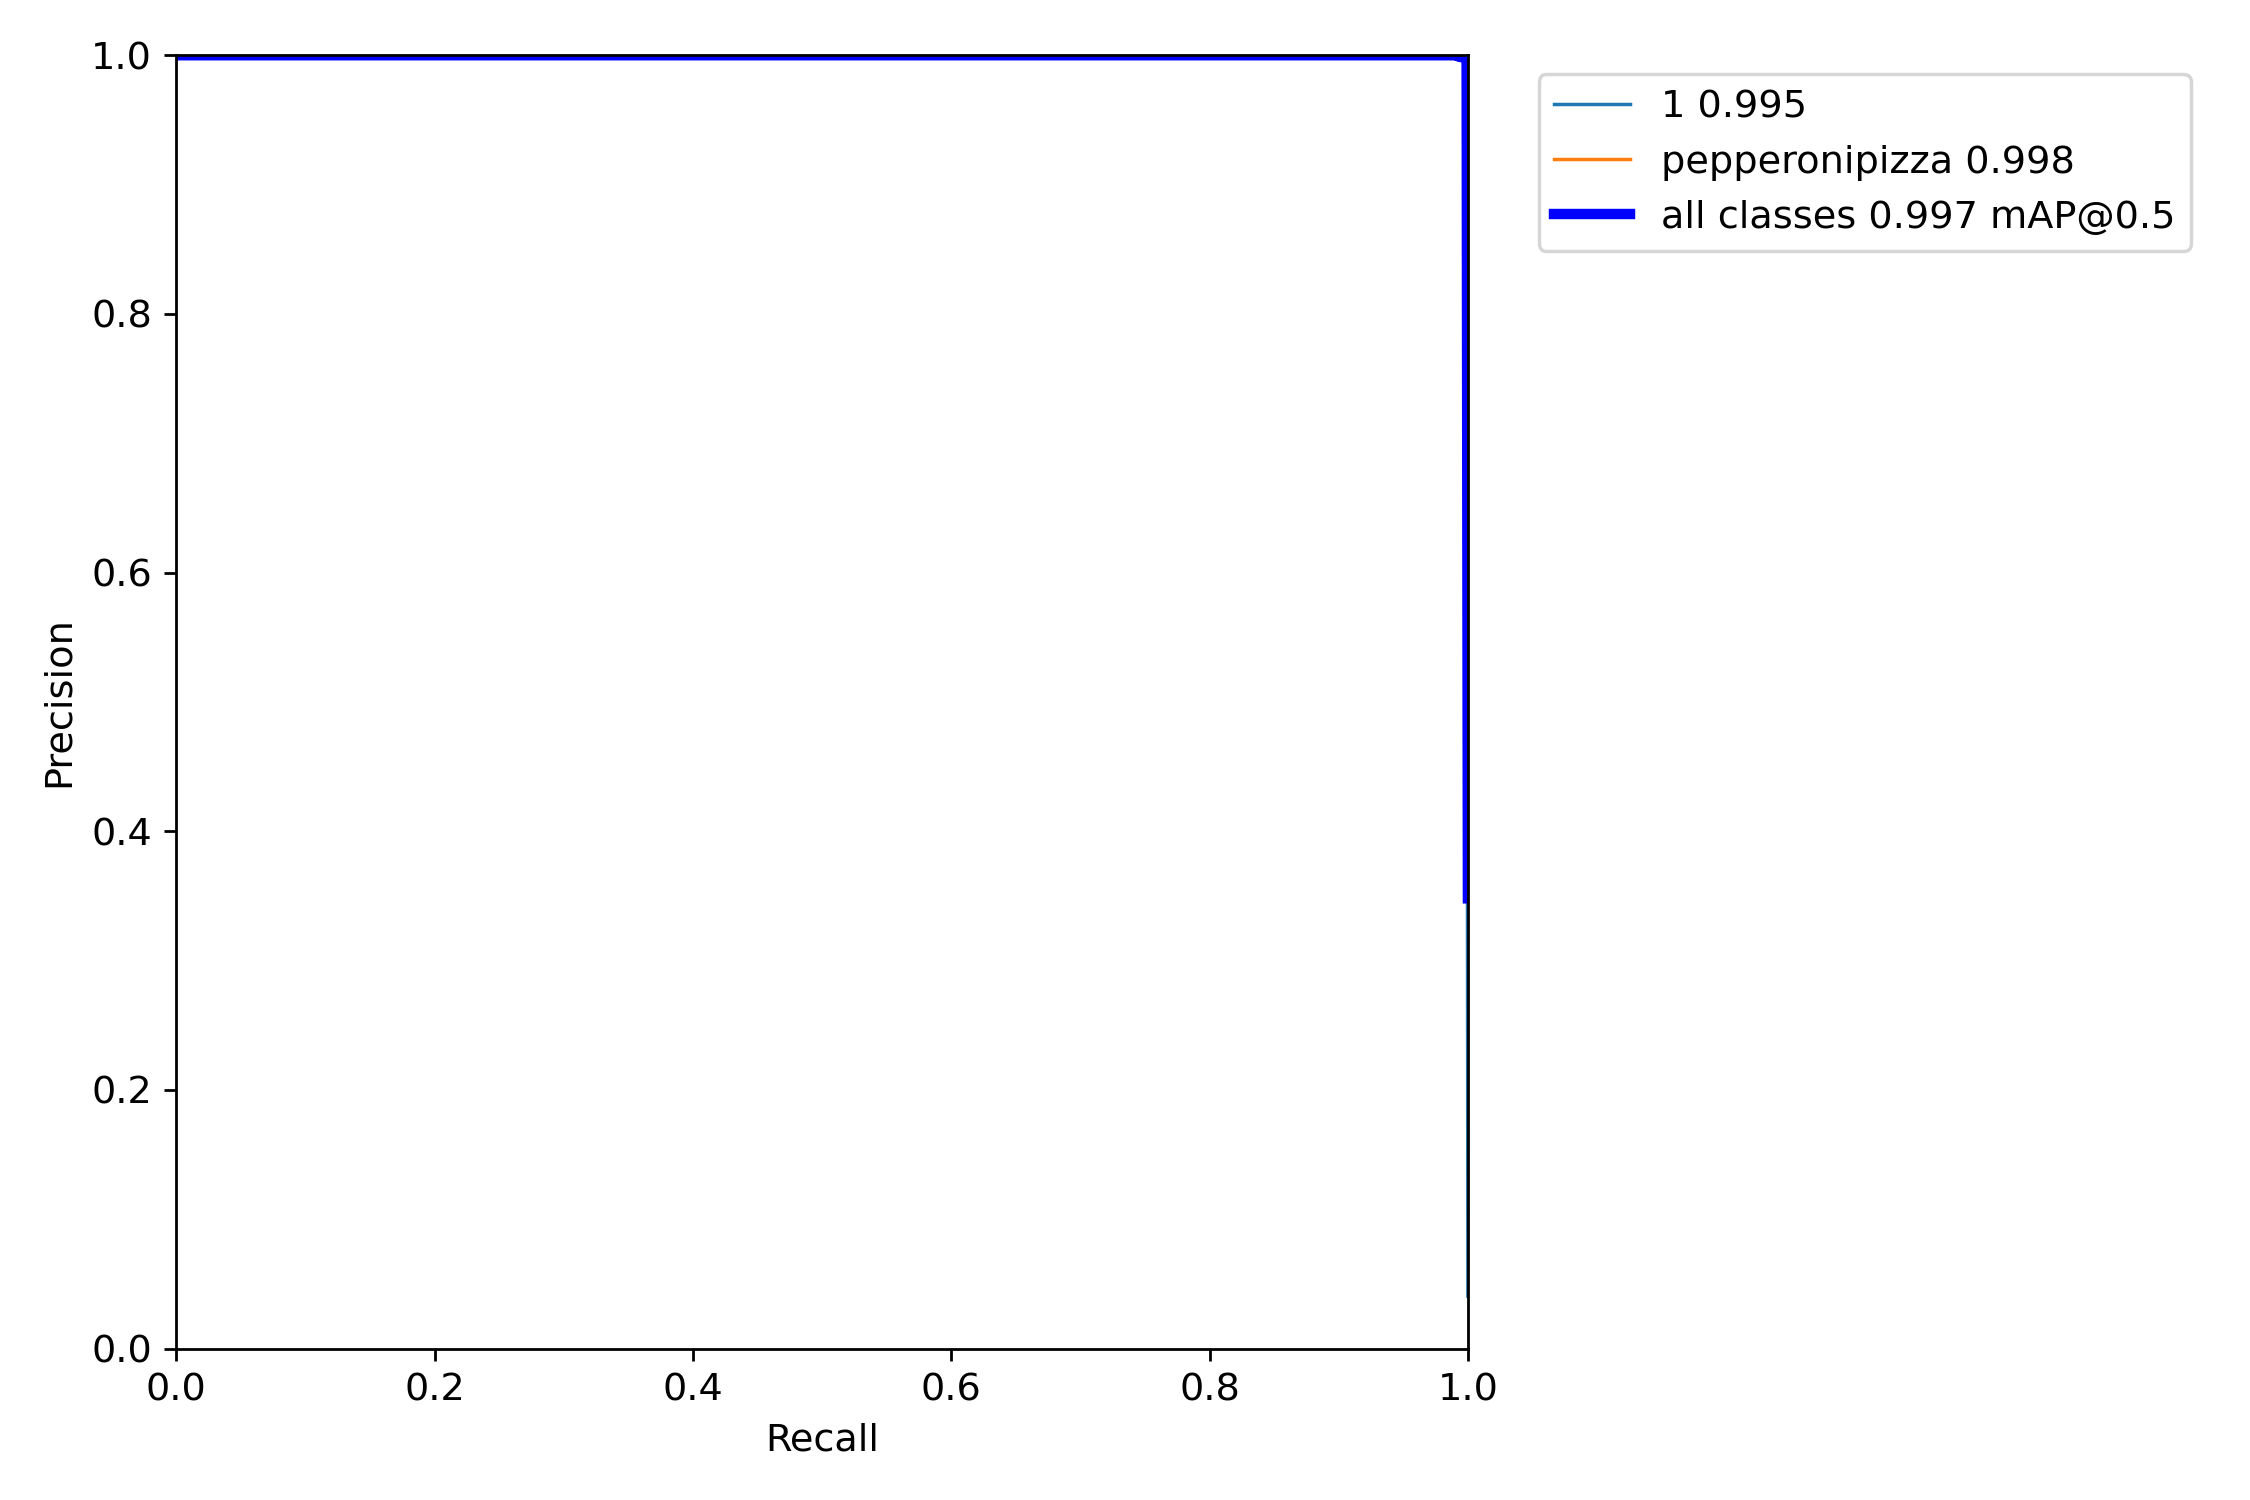

In [37]:
from IPython.display import Image, display

base_path = 'runs/train/exp12/'

plot_files = [
    "results.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "PR_curve.png"
]

for plot in plot_files:
    print(f"Showing: {plot}")
    display(Image(filename=base_path + plot))
